In [ ]:
DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [76]:
#Import data into Python environment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
#readind csv file
df=pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


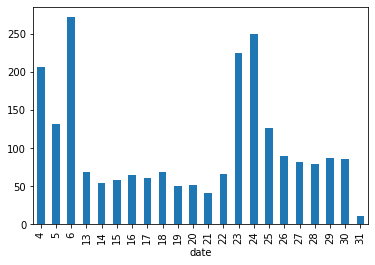

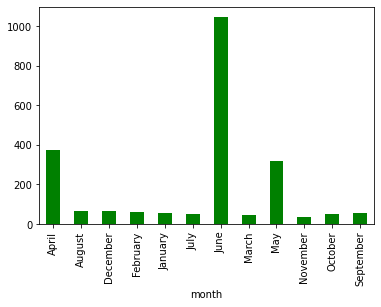

In [78]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
df['month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['date']=pd.to_datetime(df['Date_month_year']).dt.day
df.groupby(['date'])['Customer Complaint'].count().plot(kind='bar')
plt.show()
df.groupby(['month'])['Customer Complaint'].count().plot(kind='bar',color='green')
plt.show()

In [79]:
#Provide a table with the frequency of complaint types.
df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


In [80]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
df['Customer Complaint']=df['Customer Complaint'].apply(lambda x: x.lower())
df['Customer Complaint'].value_counts().head(5)

comcast              102
comcast data cap      30
comcast internet      29
comcast data caps     21
comcast billing       18
Name: Customer Complaint, dtype: int64

In [81]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
df['Status']=df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

In [82]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5
4,307175,comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No,May,26


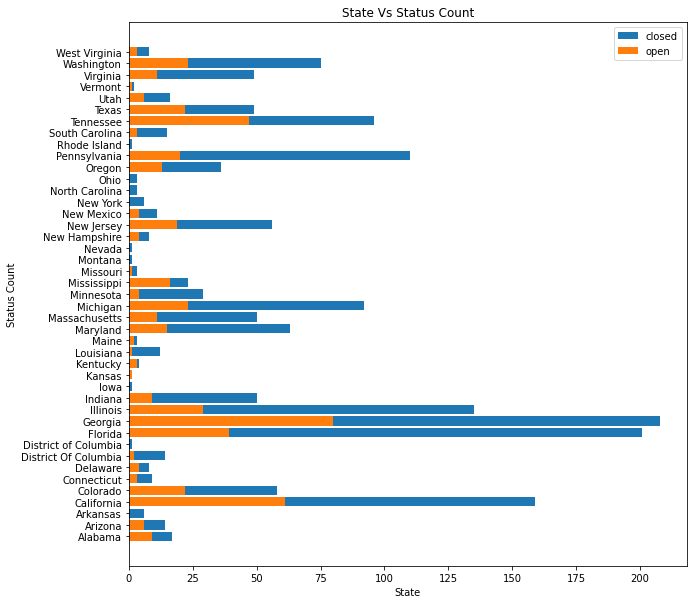

In [83]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
op1=df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
c1=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig=plt.figure(figsize=(10,10))
plt.barh(c1.State, c1.Status)
plt.barh(op1.State, op1.Status)
plt.xlabel('State',size=10)
plt.ylabel('Status Count')
plt.legend(['closed','open'])
plt.title('State Vs Status Count')
plt.show()

In [84]:
#maximum no. of open complaints
op1.sort_values('Status',ascending=False).head(3)

,State,Status
8,Georgia,80
2,California,61
27,Tennessee,47


In [85]:
#maximum no. of closed complaints
c1.sort_values('Status',ascending=False).head(3)

,State,Status
10,Georgia,208
9,Florida,201
3,California,159


In [86]:
# Which country is having maximum no. of complaints
'Georgia'

'Georgia'

In [87]:
#Which state has the highest percentage of unresolved complaints
'Georgia'

'Georgia'

In [88]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
df[df['Status']=='Closed'][['Received Via']].value_counts(normalize=True)*100

Received Via      
Customer Care Call    50.615114
Internet              49.384886
dtype: float64